In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('euromillions_Fusion.csv',sep=';', encoding='ISO-8859-1')

In [3]:
df.head()

,annee_numero_de_tirage,jour_de_tirage,date_de_tirage,numï¿½ro_de_tirage_dans_le_cycle,date_de_forclusion,boule_1,boule_2,boule_3,boule_4,boule_5,...,rapport_du_rang7_Etoile+,nombre_de_gagnant_au_rang8_Etoile+,rapport_du_rang8_Etoile+,nombre_de_gagnant_au_rang9_Etoile+,rapport_du_rang9_Etoile+,nombre_de_gagnant_au_rang10_Etoile+,rapport_du_rang10_Etoile+,numero_My_Million,numero_Tirage_Exceptionnel_Euro_Million,Unnamed: 75
0,20244007,MARDI,23/01/2024,1,24/03/2024,48,23,14,50,39,...,"4,4",12899,"11,7",30850,"2,7",308046,"2,4",KR 537 5327,NaN,NaN
1,20244006,VENDREDI,19/01/2024,1,20/03/2024,50,27,28,48,44,...,4,18046,"11,1",42691,"2,6",424081,"2,3",QE 911 6397,NaN,NaN
2,20244005,MARDI,16/01/2024,7,17/03/2024,18,21,33,45,10,...,"4,4",13958,"12,7",39974,"2,5",328733,"2,7",CU 208 5890,NaN,NaN
3,20244004,VENDREDI,12/01/2024,6,13/03/2024,18,16,17,49,45,...,"4,3",18344,"12,4",46653,"2,7",427062,"2,6",RT 208 4085,NaN,NaN
4,20244003,MARDI,09/01/2024,5,10/03/2024,12,9,2,39,40,...,"3,8",15703,"10,8",41373,"2,3",339112,"2,4",LN 958 0675,NaN,NaN


In [4]:
df_ligth = df[['boule_1','boule_2','boule_3','boule_4','boule_5','etoile_1','etoile_2']]

In [5]:
test = df[['boules_gagnantes_en_ordre_croissant','etoiles_gagnantes_en_ordre_croissant']]

In [6]:
test.head(2)

,boules_gagnantes_en_ordre_croissant,etoiles_gagnantes_en_ordre_croissant
0,-14-23-39-48-50-,-3-12-
1,-27-28-44-48-50-,-7-12-


In [7]:
df_ligth.head()

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
0,48,23,14,50,39,12,3
1,50,27,28,48,44,7,12
2,18,21,33,45,10,12,8
3,18,16,17,49,45,9,12
4,12,9,2,39,40,3,1


In [8]:
for column in df_ligth.columns:
    counts = df_ligth[column].value_counts()
#    print(f"\nDistribution of {column}:\n{counts}")

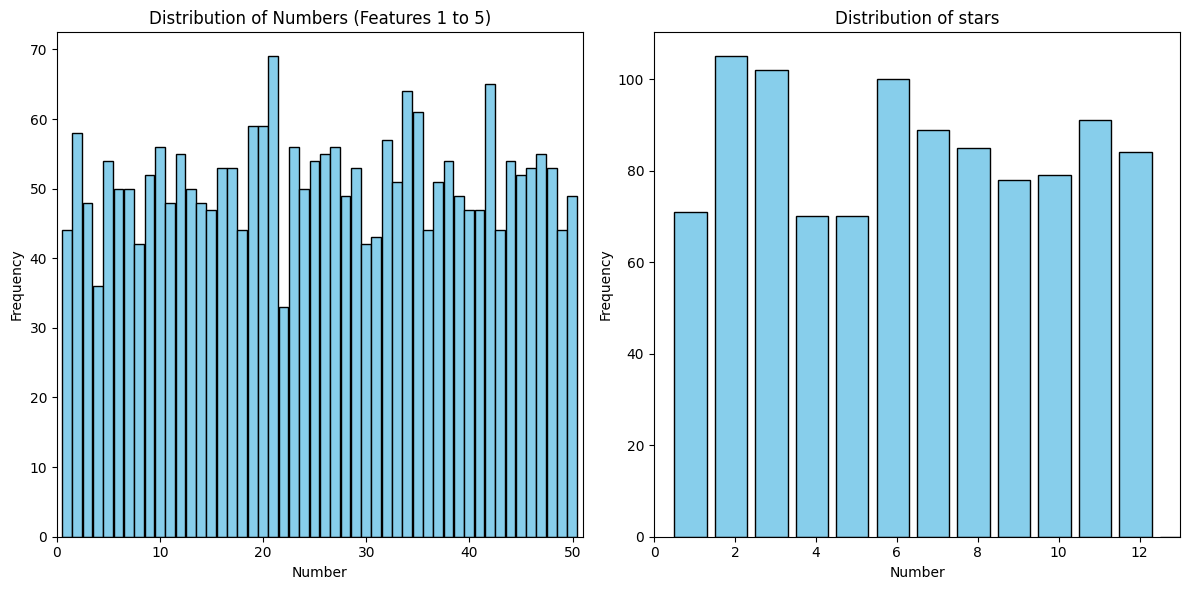

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

bin_edges = [edge - 0.5 for edge in range(df_ligth.min().min(), df_ligth.max().max() + 2)]
# Histogram for features 1 to 5
axes[0].hist(df_ligth.iloc[:, :5].values.flatten(), bins=bin_edges, color='skyblue', edgecolor='black', width=0.95)
axes[0].set_title('Distribution of Numbers (Features 1 to 5)')
axes[0].set_xlabel('Number')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim([0, 51])

# Histogram for features 6 and 7
hist_2 = axes[1].hist(df_ligth.iloc[:, 5:].values.flatten(), bins=bin_edges, color='skyblue', edgecolor='black', width=0.8)
axes[1].set_title('Distribution of stars')
axes[1].set_xlabel('Number')
axes[1].set_ylabel('Frequency')

# Customize x-axis labels for the second subplot
# axes[1].set_xticks(hist_2[1])
# axes[1].set_xticklabels(hist_2[1])
axes[1].set_xlim([0, 13])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

## Create Data with a windows

In [10]:
# frequency of a number in the last window rows
def count_frequency(dataframe, windows):
    df_ = dataframe.copy()
    for col in ['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']:
        df_[f'freq_{col}'] = df_.apply(lambda row: sum(df_[['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']].iloc[max(0, row.name - windows):row.name].values.flatten() == row[col]), axis=1)
    for col in ['etoile_1', 'etoile_2']:
        df_[f'freq_{col}'] = df_.apply(lambda row: sum(df_[['etoile_1', 'etoile_2']].iloc[max(0, row.name - windows):row.name].values.flatten() == row[col]), axis=1)
    return df_

In [11]:
df_ligth.tail(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
510,16,10,46,39,6,8,11
511,9,19,26,31,6,12,11


In [12]:
df_ligth.head(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
0,48,23,14,50,39,12,3
1,50,27,28,48,44,7,12


In [13]:
df_ligth = df_ligth[::-1].reset_index(drop=True)

In [14]:
df_ligth.tail(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
510,50,27,28,48,44,7,12
511,48,23,14,50,39,12,3


In [15]:
df_ligth.head(2)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2
0,9,19,26,31,6,12,11
1,16,10,46,39,6,8,11


In [16]:
df_extend = count_frequency(df_ligth, windows = 12)

In [17]:
df_extend.shape

(512, 14)

In [18]:
df_extend.head(15)

,boule_1,boule_2,boule_3,boule_4,boule_5,etoile_1,etoile_2,freq_boule_1,freq_boule_2,freq_boule_3,freq_boule_4,freq_boule_5,freq_etoile_1,freq_etoile_2
0,9,19,26,31,6,12,11,0,0,0,0,0,0,0
1,16,10,46,39,6,8,11,0,0,0,0,1,0,1
2,40,17,24,19,18,8,4,0,0,0,1,0,1,0
3,5,13,7,19,31,9,2,0,0,0,2,1,0,0
4,46,24,42,15,3,12,9,1,1,0,0,0,1,1
5,9,6,1,47,34,12,7,1,2,0,0,0,2,0
6,17,43,26,4,30,11,6,1,0,1,0,0,2,0
7,47,43,19,23,12,2,6,1,1,3,0,0,1,1
8,13,23,26,47,32,6,10,1,1,2,2,0,2,0
9,9,26,16,2,36,6,7,2,3,1,0,0,3,1


In [22]:
df_extend = df_extend.drop(['etoile_1', 'etoile_2', 'freq_etoile_1', 'freq_etoile_2'], axis = 1)

In [23]:
# Function to create sequences for X and y
def create_sequences(data, length):
    X,Y = [],[]
    for i in range(len(data)-length):
        X.append(data.iloc[i:i+length, 0:data.shape[1]].values)
        Y.append(data.iloc[i+length, 0:5])

    return np.array(X),np.array(Y)

# Define the sequence length
rows_windows = 12

# Create sequences for X and y
X, y = create_sequences(df_extend, rows_windows)

# Print the shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (500, 12, 10)
y shape: (500, 5)


In [24]:
print(X[-1])

[[43 39 28 37  6  0  3  0  0  1]
 [ 2 13 37 38 48  1  1  1  2  2]
 [20 43 41 45 10  2  1  0  0  3]
 [14 49 34 44  6  1  0  1  2  2]
 [47 27  8 30 35  1  1  0  1  0]
 [ 2 36 19 37  3  2  0  1  2  0]
 [ 7 18 49 46 15  0  0  1  1  1]
 [18  4 39  7 50  1  2  2  1  2]
 [12  9  2 39 40  1  0  2  2  0]
 [18 16 17 49 45  2  0  1  2  1]
 [18 21 33 45 10  3  0  0  2  1]
 [50 27 28 48 44  2  1  1  2  1]]


In [25]:
print(y[-1])

[48 23 14 50 39]


In [31]:
# Scaled data because StandardScaler expected <= 2 dim
from sklearn.model_selection import train_test_split

X_scaled = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, shuffle=False)

In [32]:
print('X_train:', X_train.shape, 'X_test:', X_test.shape)
print('y_train:', y_train.shape, 'y_test:', y_test.shape)

X_train: (450, 12, 10) X_test: (50, 12, 10)
y_train: (450, 5) y_test: (50, 5)


##Model: TSLM

In [34]:
# LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Define the model
def my_LSTM(units, window_length, nb_label_feature, nb_label, dropout):

    model = Sequential()

    # We add two layers of LSTM
    model.add(LSTM(units=units, input_shape=(window_length, nb_label_feature), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=units, return_sequences=False))
    # model.add(Dropout(0.2))
    # Output layer
    model.add(Dense(units=nb_label))

    return model

In [35]:
units = 64
window_length = rows_windows
nb_feature = X_train.shape[2]
nb_label = y.shape[1]
DROPOUT = 0.2
BATCHSIZE = 64
EPOCHS = 5000
OPTIMIZER  = Adam(learning_rate=0.0002)#'rmsprop'#
# ACTIVATION = 'softmax'
LOSS = 'mean_squared_error'

In [36]:
model = my_LSTM(units, window_length, nb_feature, nb_label, DROPOUT)
model.compile(loss = LOSS, optimizer = OPTIMIZER, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 12, 64)            19200     
                                                                 
 dropout_2 (Dropout)         (None, 12, 64)            0         
                                                                 
 lstm_4 (LSTM)               (None, 12, 64)            33024     
                                                                 
 dropout_3 (Dropout)         (None, 12, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 85573 (334.27 KB)
Trainable params: 8557

In [ ]:
# # Define early stopping

# early_stop = EarlyStopping(monitor='val_loss', patience=3000, restore_best_weights=True)

In [ ]:
# history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE)
# # history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE, validation_data=(X_test, y_test), callbacks=[early_stop, my_lr_scheduler], verbose=1)
# model.save('test'+'.h5')

In [37]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCHSIZE)
model.save(f'test_valid_test_{units}_{BATCHSIZE}_{window_length}_{DROPOUT}'+'.h5')

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
8/8 [==============================] - 0s 11ms/step - loss: 113.7204 - accuracy: 0.5133
Epoch 2502/5000
8/8 [==============================] - 0s 11ms/step - loss: 112.6889 - accuracy: 0.5089
Epoch 2503/5000
8/8 [==============================] - 0s 12ms/step - loss: 113.4080 - accuracy: 0.4978
Epoch 2504/5000
8/8 [==============================] - 0s 12ms/step - loss: 113.0253 - accuracy: 0.5022
Epoch 2505/5000
8/8 [==============================] - 0s 12ms/step - loss: 112.7539 - accuracy: 0.4911
Epoch 2506/5000
8/8 [==============================] - 0s 11ms/step - loss: 111.9633 - accuracy: 0.5022
Epoch 2507/5000
8/8 [==============================] - 0s 11ms/step - loss: 112.5156 - accuracy: 0.5111
Epoch 2508/5000
8/8 [==============================] - 0s 10ms/step - loss: 113.2431 - accuracy: 0.5111
Epoch 2509/5000
8/8 [==============================] - 0s 10ms/step - loss: 113.2211 - accuracy: 0.5067
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


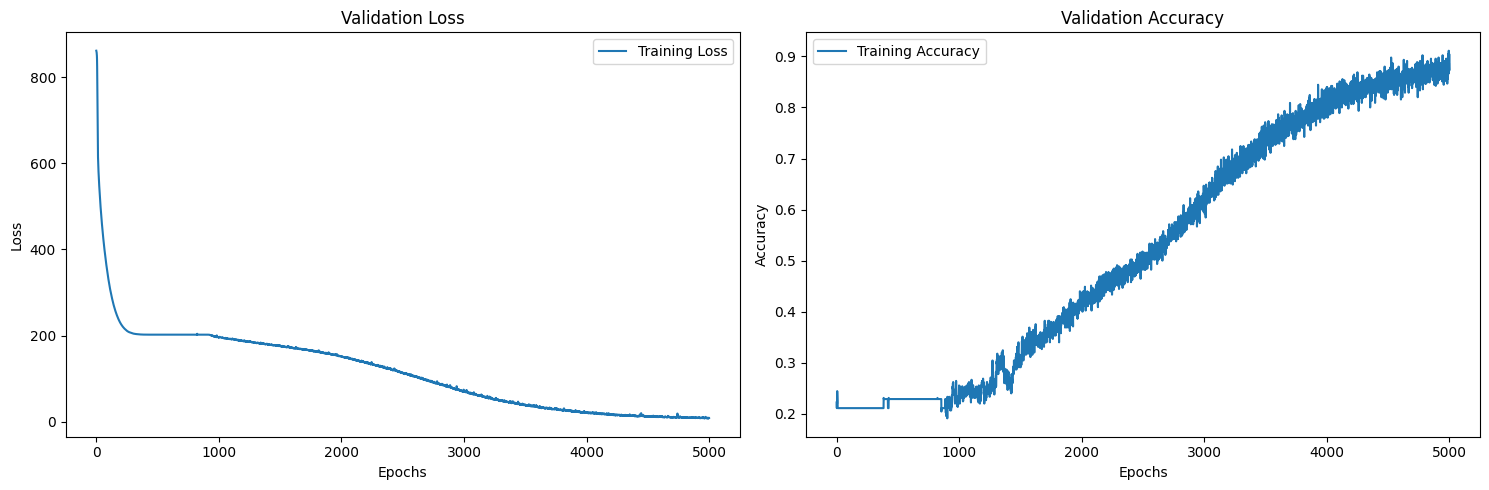

In [38]:
plt.figure(figsize=(15, 5))

# Subplot pour la Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot pour l'Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Ajuster automatiquement la disposition des sous-graphiques pour éviter les chevauchements
plt.show()

In [39]:
predictions = model.predict(X_test)

2/2 [==============================] - 1s 9ms/step


In [46]:
for idx in range (0,50) :
  print('\ny_pred', np.round(predictions[idx]).astype(int), '\ny_test', y_test[idx])


y_pred [38 45 44 34 42] 
y_test [15 31 48 20 44]

y_pred [27 31 33 26 40] 
y_test [40  8 33  9 35]

y_pred [22 27 47 46 42] 
y_test [10 13 34  4  6]

y_pred [28 12 48 26 15] 
y_test [ 3 32  5 43  9]

y_pred [28 35 45 34 10] 
y_test [47 25 23 30 44]

y_pred [23 42 48 16  8] 
y_test [23  9 40  2 32]

y_pred [37 41 43  8 15] 
y_test [44 35 16 34 17]

y_pred [30 46 34 36  0] 
y_test [21 40 23 32 49]

y_pred [23 31 11 41 -2] 
y_test [35 43 37  5  4]

y_pred [27 25 15 39 16] 
y_test [41 48  7  1 24]

y_pred [23 24  8 50 19] 
y_test [33 20 10 21 26]

y_pred [35 14 23 39 27] 
y_test [14  5 42 36 40]

y_pred [28  0 42 23 31] 
y_test [21 45 12 48 14]

y_pred [29 33 45 13  6] 
y_test [10 31 41 15 42]

y_pred [31 31 50 19 46] 
y_test [ 3 23 35 34 24]

y_pred [38 31 35  9 33] 
y_test [14  6 23  2 19]

y_pred [28  9 21 17 37] 
y_test [32  9 11 21 13]

y_pred [28 28 41 41 39] 
y_test [45  6 22 24 20]

y_pred [22 39 10 37 15] 
y_test [31 43 21 29 34]

y_pred [26 13 33 45 22] 
y_test [18 33 20 22 43]
